In [1]:
#load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from sklearn.metrics import classification_report

plt.style.use('ggplot')

In [11]:
#load data
#train
train_values = pd.read_csv('I:/Python Scripts/DataDriven/ML with a Heart/train_values.csv')
train_labels = pd.read_csv('I:/Python Scripts/DataDriven/ML with a Heart/train_labels.csv')
train = pd.merge(train_values, train_labels, on=['patient_id'])

train = train.set_index('patient_id')



#test
test_values = pd.read_csv('I:/Python Scripts/DataDriven/ML with a Heart/test_values.csv', index_col = 0)

In [12]:
# eerste inzicht
train.shape

train.head()

print(train.info())

print(train.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0z64un to 2nx10r
Data columns (total 14 columns):
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
heart_disease_present                   180 non-null int64
dtypes: float64(1), int64(12), object(1)
memory usage: 21.1+ KB

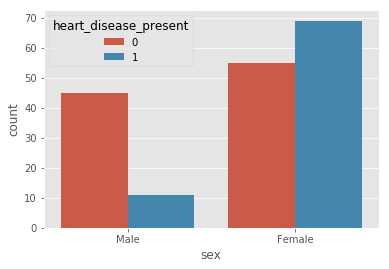

In [13]:
#Visual EDA
#sex
plt.figure()
sns.countplot(x = 'sex', hue = 'heart_disease_present', data = train )
plt.xticks([0,1], ['Male', "Female"])
plt.show()
#meer vrouwen met een hart ziekte

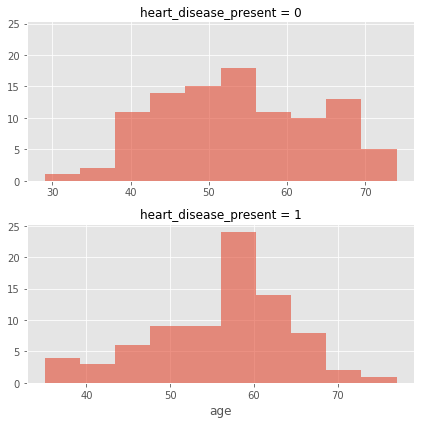

In [14]:
#age
g = sns.FacetGrid(train, row='heart_disease_present', size=3, aspect=2, sharex='none')
_ = g.map(plt.hist, 'age', alpha=0.6)

#over het algemeen zijn mensen met een hart ziekte ouder

In [17]:
#OHE categorical variable



train = pd.get_dummies(train,  drop_first = True)

train.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_normal,thal_reversible_defect
patient_id,,,,,,,,,,,,,,,
0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,1,0
ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,1,0
yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,1,1,0
l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,1
oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,1


In [18]:
y = train.heart_disease_present.values
X = train.drop('heart_disease_present', axis = 1).values

#create hyperparamater grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

#instantiate log reg classifier
logreg = LogisticRegression()

#create train/test split on train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 2018)

#GridSearchCV
logreg_cv = GridSearchCV(logreg,  param_grid = param_grid , cv = 10)


# Fit it to the training data
logreg_cv.fit(X_train, y_train,)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

# Predict the labels of the test set: y_pred
y_pred_probs = logreg_cv.predict_proba(X_test)
score = log_loss(y_test, y_pred_probs)
print("Tuned Logistic Regression Log loss: {}".format(score))




Tuned Logistic Regression Parameter: {'C': 0.05179474679231213, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.8055555555555556
Tuned Logistic Regression Log loss: 0.4190123848189847


In [35]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC(probability =True))]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =2018)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)
y_pred_probs = cv.predict_proba(X_test)
score = log_loss(y_test, y_pred_probs)
print("Tuned SVM Log loss: {}".format(score))

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Tuned SVM Log loss: 0.4590605275672761
Accuracy: 0.7777777777777778
             precision    recall  f1-score   support

          0       0.83      0.80      0.81        44
          1       0.70      0.75      0.72        28

avg / total       0.78      0.78      0.78        72

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}


In [50]:
# Logistic Regression heeft hogere log loss
test_values = pd.get_dummies(test_values,  drop_first = True)

Prediction = logreg_cv.predict_proba(test_values)


In [55]:
test_values_reindex = test_values.reset_index()

test_values_reindex['Prediction'] = logreg_cv.predict_proba(test_values)[:,1]

Submission = test_values_reindex.loc[:,['patient_id', 'Prediction']]


In [57]:
Submission = Submission.rename(columns = {'Prediction':'heart_disease_present'})

Submission.to_csv('I:/Python Scripts/DataDriven/ML with a Heart/Submission.csv', index=False)
